# Forecasting Task

The goal of this task is to build a model that forecasts the estimated total gross with the available data. The
assignment description can be found using the following link: https://hackmd.io/biEvk-M2RNeGQ2WfCsCzzA

In this section we will be working through linear regression with the following steps:

    A. Data Analysis
        1. Getting and setting up the data
        2. Getting a data overview
        3. Visualizing current data
        4. Implementing a multivariate regression
    B. Data Insights
        1. Setting Training and Validation datasets
        2. Predicting the estimated total gross
        3. Residual Plots
    C. Conclusion
    

# A. Data Analysis

### 1. Getting and setting up the data

First we'll import our usual data analysis imports.

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

from datetime import datetime, timedelta
import datetime

Imports for plotting.

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set_style('whitegrid')

# Command so that plots appear in the iPython Notebook
%matplotlib inline

Retrieve dataset from csv file to pandas DataFrame.

In [3]:
file = 'src/ml-faker_random_sample-contracts.csv'
df_raw = pd.read_csv(file)

Display head of the dataframe.

In [4]:
pd.set_option('display.max_columns', None)
df_raw.head()

,hiring_id,wp_id,hiring_status,wp_status,business_model,company_id,company_name,hiring_created_at,wp_created_at,hiring_starts_on,hiring_ends_on,wp_starts_on,wp_ends_on,job_function,job_country,candidate_id,candidate_name,total_gross,est_total_gross,currency,issue_reported,contract_type,gross_wage_amount,gross_wage_time_unit,gross_wage_currency_id,work_period_unit,work_period_amount,work_period_hours,fee_percentage,cancellation_date,is_outsourced
0,166037,1723992,ready_to_work,upcoming,staffing_agency,299204747,Hurst-Garcia,2017-01-12 15:57:41.000000,2017-09-13 09:01:22.000000,2017-01-16,2021-01-15,2020-04-01,2020-04-30,support-guy,ES,49285305,Kenneth Price,1114.285714,1114.285714,EUR,False,full_time,650,hour,EUR,month,2.0,40.0,3.92,NaN,NaN
1,569936,7254150,hiring_closed_out,paid,staffing_agency,237165491,Reese and Sons,2017-02-27 10:27:24.000000,2017-03-19 13:50:52.000000,2017-02-27,2017-05-28,2017-03-20,2017-03-26,noise-guy,GB,57619821,Susan Santos,346.970000,364.877990,GBP,False,by_hours,750,hour,GBP,week,12.0,40.0,10.09,NaN,NaN
2,352139,4706480,hiring_closed_out,paid,staffing_agency,168767792,Peterson-Wilson,2017-01-10 17:02:04.000000,2017-01-10 17:23:14.000000,2017-01-10,2018-01-09,2017-10-01,2017-10-31,f1-guy,ES,57564699,Susan Jensen,1061.660000,1041.660000,EUR,False,full_time,104166,month,EUR,month,12.0,40.0,5.00,NaN,NaN
3,313527,5362133,hiring_closed_out,paid,independent_contractor,211514331,Eaton LLC,2017-09-07 15:10:16.000000,2018-02-01 16:15:30.000000,2017-09-04,2018-03-18,2018-01-29,2018-02-04,drop-guy,GB,57795686,Michael Day,455.000000,390.840322,GBP,True,full_time,800,hour,GBP,week,12.0,40.0,9.00,NaN,NaN
4,425850,5002046,hiring_closed_out,paid,staffing_agency,146877029,Adams LLC,2017-07-04 08:33:55.000000,2017-07-10 14:50:53.000000,2017-07-10,2017-08-28,2017-08-01,2017-08-28,f1-guy,ES,52752416,Christie Keller,664.280000,1031.968000,EUR,False,full_time,110568,month,EUR,month,1.6,40.0,0.00,NaN,NaN


Check column datatypes

In [5]:
print('Columns datetypes:')
df_raw.dtypes

Columns datetypes:


hiring_id                   int64
wp_id                       int64
hiring_status              object
wp_status                  object
business_model             object
company_id                  int64
company_name               object
hiring_created_at          object
wp_created_at              object
hiring_starts_on           object
hiring_ends_on             object
wp_starts_on               object
wp_ends_on                 object
job_function               object
job_country                object
candidate_id                int64
candidate_name             object
total_gross               float64
est_total_gross           float64
currency                   object
issue_reported               bool
contract_type              object
gross_wage_amount           int64
gross_wage_time_unit       object
gross_wage_currency_id     object
work_period_unit           object
work_period_amount        float64
work_period_hours         float64
fee_percentage            float64
cancellation_d

Let's convert string dates (object) into datetime datatype

In [6]:
columns_2convert_2datetime = ['hiring_created_at','hiring_starts_on','hiring_ends_on',
                              'wp_created_at','wp_starts_on','wp_ends_on']
for column in columns_2convert_2datetime:
    df_raw[column] = pd.to_datetime(df_raw[column])
#Save processed dataframe with different name
df = df_raw.copy()

In [7]:
df.dtypes

hiring_id                          int64
wp_id                              int64
hiring_status                     object
wp_status                         object
business_model                    object
company_id                         int64
company_name                      object
hiring_created_at         datetime64[ns]
wp_created_at             datetime64[ns]
hiring_starts_on          datetime64[ns]
hiring_ends_on            datetime64[ns]
wp_starts_on              datetime64[ns]
wp_ends_on                datetime64[ns]
job_function                      object
job_country                       object
candidate_id                       int64
candidate_name                    object
total_gross                      float64
est_total_gross                  float64
currency                          object
issue_reported                      bool
contract_type                     object
gross_wage_amount                  int64
gross_wage_time_unit              object
gross_wage_curre

### 2. Getting a data overview

Get some basic information about the this 20000 rows x 12 columns dataset.

In [8]:
print('Hiring status categories:')
print(list(df['hiring_status'].unique()), '\n')

print('Hiring creation date :')
print('     min: ', df['hiring_created_at'].min())
print('     max: ', df['hiring_created_at'].max())
print('Note: Seems to be correct.','\n')

print('Hiring starting date :')
print('     min: ', df['hiring_starts_on'].min())
print('     max: ', df['hiring_starts_on'].max())
print('Note: Seems to be correct.','\n')

print('Is always the hiring starting date before than the ending date?')
print((df['hiring_starts_on'] <= df['hiring_ends_on']).value_counts())
print('Note: 932 hirings starts and ends on the same day. No inconsistency','\n')

print('Is always the hiring registration date before than the starting date?')
print((df['hiring_created_at'].dt.strftime('%Y/%m/%d') <= df['hiring_starts_on'].dt.strftime('%Y/%m/%d')).value_counts())
print('Note: Might be common to register the hiring after the starting date BUT probable inconsistency.','\n')

print('Work period status categories:')
print(list(df['wp_status'].unique()), '\n')

print("Is always the work permit registration date before than the wp's starting date?")
print((df['wp_created_at'].dt.strftime('%Y/%m/%d') <= df['wp_starts_on'].dt.strftime('%Y/%m/%d')).value_counts())
print('Note: Might be common to register the hiring after the starting date BUT probable inconsistency.','\n')

print('Is always the work permit starting date before than the ending date?')
print((df['wp_starts_on'] < df['wp_ends_on']).value_counts())
print('Error found: 2 rows seem to be wrong and for the 1272 others, the work permit starts and ends on the same day.','\n')


Hiring status categories:
['ready_to_work', 'hiring_closed_out', 'hiring_cancelled', 'pending_cancellation', 'employer_ready_to_work'] 

Hiring creation date :
     min:  2016-10-14 10:09:00
     max:  2018-03-20 12:17:37
Note: Seems to be correct. 

Hiring starting date :
     min:  2015-02-02 00:00:00
     max:  2019-10-25 00:00:00
Note: Seems to be correct. 

Is always the hiring starting date before than the ending date?
True    20000
dtype: int64
Note: 932 hirings starts and ends on the same day. No inconsistency 

Is always the hiring registration date before than the starting date?
True     15697
False     4303
dtype: int64
Note: Might be common to register the hiring after the starting date BUT probable inconsistency. 

Work period status categories:
['upcoming', 'paid', 'payslip_generated', 'working', 'reviewed', 'timesheet_missing', 'acceptance_pending'] 

Is always the work permit registration date before than the wp's starting date?
True     15010
False     4990
dtype: int6

Check those hirings started before having the working permit.

In [9]:
df[df['wp_starts_on'] < df['hiring_starts_on']]

,hiring_id,wp_id,hiring_status,wp_status,business_model,company_id,company_name,hiring_created_at,wp_created_at,hiring_starts_on,hiring_ends_on,wp_starts_on,wp_ends_on,job_function,job_country,candidate_id,candidate_name,total_gross,est_total_gross,currency,issue_reported,contract_type,gross_wage_amount,gross_wage_time_unit,gross_wage_currency_id,work_period_unit,work_period_amount,work_period_hours,fee_percentage,cancellation_date,is_outsourced
7988,561482,3584426,hiring_closed_out,paid,staffing_agency,83773059,Hall Group,2017-06-30 10:06:09,2017-06-30 14:23:43,2017-08-28,2017-08-28,2017-07-03,2017-07-03,annoying-guy,ES,57565447,Timothy Frye,119.07,87.28,EUR,False,by_hours,1091,hour,EUR,day,1.0,8.0,5.0,NaN,NaN


Check those hirings that will require or have required to request a working permit before the end of the contract.

In [10]:
df[df['wp_ends_on'] < df['hiring_ends_on']]

,hiring_id,wp_id,hiring_status,wp_status,business_model,company_id,company_name,hiring_created_at,wp_created_at,hiring_starts_on,hiring_ends_on,wp_starts_on,wp_ends_on,job_function,job_country,candidate_id,candidate_name,total_gross,est_total_gross,currency,issue_reported,contract_type,gross_wage_amount,gross_wage_time_unit,gross_wage_currency_id,work_period_unit,work_period_amount,work_period_hours,fee_percentage,cancellation_date,is_outsourced
0,166037,1723992,ready_to_work,upcoming,staffing_agency,299204747,Hurst-Garcia,2017-01-12 15:57:41,2017-09-13 09:01:22,2017-01-16,2021-01-15,2020-04-01,2020-04-30,support-guy,ES,49285305,Kenneth Price,1114.285714,1114.285714,EUR,False,full_time,650,hour,EUR,month,2.0,40.0,3.92,NaN,NaN
1,569936,7254150,hiring_closed_out,paid,staffing_agency,237165491,Reese and Sons,2017-02-27 10:27:24,2017-03-19 13:50:52,2017-02-27,2017-05-28,2017-03-20,2017-03-26,noise-guy,GB,57619821,Susan Santos,346.970000,364.877990,GBP,False,by_hours,750,hour,GBP,week,12.0,40.0,10.09,NaN,NaN
2,352139,4706480,hiring_closed_out,paid,staffing_agency,168767792,Peterson-Wilson,2017-01-10 17:02:04,2017-01-10 17:23:14,2017-01-10,2018-01-09,2017-10-01,2017-10-31,f1-guy,ES,57564699,Susan Jensen,1061.660000,1041.660000,EUR,False,full_time,104166,month,EUR,month,12.0,40.0,5.00,NaN,NaN
3,313527,5362133,hiring_closed_out,paid,independent_contractor,211514331,Eaton LLC,2017-09-07 15:10:16,2018-02-01 16:15:30,2017-09-04,2018-03-18,2018-01-29,2018-02-04,drop-guy,GB,57795686,Michael Day,455.000000,390.840322,GBP,True,full_time,800,hour,GBP,week,12.0,40.0,9.00,NaN,NaN
5,148520,6879092,hiring_closed_out,payslip_generated,staffing_agency,396877181,Gonzales-Zuniga,2016-10-14 10:09:00,2016-10-14 14:04:55,2016-10-17,2017-01-17,2016-11-01,2016-11-30,editor,ES,41650643,Bradley Barron,1058.280000,1042.760000,EUR,False,full_time,104276,month,EUR,month,3.0,40.0,10.00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,644054,7599990,hiring_closed_out,paid,staffing_agency,361157247,Moore LLC,2017-09-14 15:21:01,2017-09-18 09:54:33,2017-09-18,2017-12-15,2017-10-01,2017-10-31,minister,ES,57011657,Bridget Ayala,1062.000000,1062.000000,EUR,False,full_time,106200,month,EUR,month,2.9,40.0,10.00,NaN,NaN
19996,880498,5606394,ready_to_work,payslip_generated,independent_contractor,343058694,"Howard, Robinson and Simpson",2017-06-22 08:57:22,2017-06-22 08:57:42,2017-03-17,2017-06-25,2017-03-27,2017-04-02,drop-guy,GB,55881339,James Perkins,390.840322,390.840322,GBP,False,full_time,800,hour,GBP,week,12.0,40.0,9.30,NaN,NaN
19997,368202,3299155,hiring_closed_out,reviewed,independent_contractor,211514331,Eaton LLC,2017-09-08 09:45:19,2017-09-27 23:46:06,2017-09-04,2018-03-25,2017-09-18,2017-09-24,drop-guy,GB,57796388,Timothy Porter,582.000000,390.840322,GBP,True,full_time,800,hour,GBP,week,12.0,40.0,9.00,NaN,NaN
19998,471586,7424423,ready_to_work,paid,staffing_agency,145692788,Lopez-Rivera,2017-08-24 16:48:56,2017-08-28 15:47:17,2017-08-29,2018-08-28,2017-11-01,2017-11-30,f1-guy,ES,57782167,Savannah Thornton,1292.930000,1258.340000,EUR,False,full_time,125834,month,EUR,month,3.0,40.0,6.00,NaN,NaN


Check null values.

In [11]:
for column in df:
    print(df[column].isnull().value_counts())

False    20000
Name: hiring_id, dtype: int64
False    20000
Name: wp_id, dtype: int64
False    20000
Name: hiring_status, dtype: int64
False    20000
Name: wp_status, dtype: int64
False    20000
Name: business_model, dtype: int64
False    20000
Name: company_id, dtype: int64
False    20000
Name: company_name, dtype: int64
False    20000
Name: hiring_created_at, dtype: int64
False    20000
Name: wp_created_at, dtype: int64
False    20000
Name: hiring_starts_on, dtype: int64
False    20000
Name: hiring_ends_on, dtype: int64
False    20000
Name: wp_starts_on, dtype: int64
False    20000
Name: wp_ends_on, dtype: int64
False    20000
Name: job_function, dtype: int64
False    20000
Name: job_country, dtype: int64
False    20000
Name: candidate_id, dtype: int64
False    20000
Name: candidate_name, dtype: int64
False    20000
Name: total_gross, dtype: int64
False    20000
Name: est_total_gross, dtype: int64
False    20000
Name: currency, dtype: int64
False    20000
Name: issue_reported, dtype:

### 3. Visualizing current data

Let's see if there is any particular pattern among the salary values? (for job_function , company, period of the year, etc.

In [12]:
df['job_function'].value_counts() 

drop-guy                7030
f1-guy                  4352
minister                2217
support-guy             1536
restaurant-hotel-guy    1193
caller                   696
annoying-guy             371
noise-guy                358
chef                     343
buzz-guy                 336
people-guy               230
store-noise-guy          223
ware-man                 152
ads-guy                  115
knowledge-guy             88
chain-guy                 87
editor                    74
carwasher                 64
happy-guy                 57
constructor               49
testing-guy               46
event-guy                 45
money-guy                 38
dude-guy                  34
beer-guy                  33
dev-guy                   27
smooth-guy                22
painter                   21
dontmesswithme-guy        17
cool-guy                  16
top-guy                   16
tech-guy                  16
dream-constructor         10
tech-art-guy               9
org-guy       

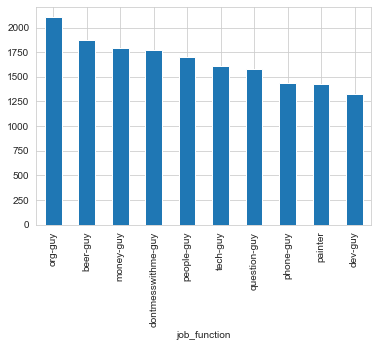

In [13]:
# Top 10 best paid job functions
df['total_gross'].groupby(df['job_function']).mean().sort_values(ascending=False)[:10].plot(kind='bar')

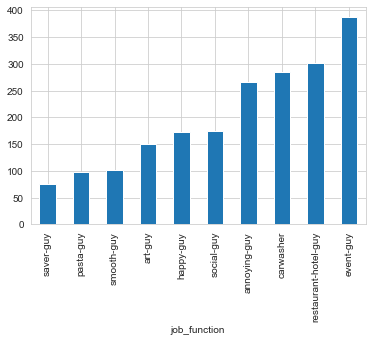

In [14]:
# Top 10 worst paid job functions
df['total_gross'].groupby(df['job_function']).mean().sort_values(ascending=True)[:10].plot(kind='bar')

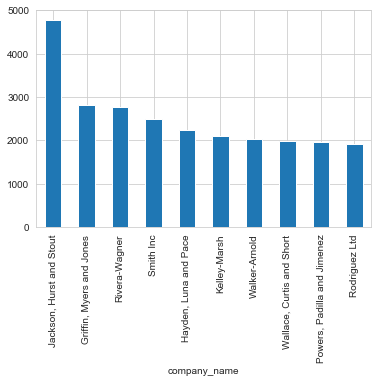

In [15]:
# Top 10 best paid companies
df['total_gross'].groupby(df['company_name']).mean().sort_values(ascending=False)[:10].plot(kind='bar')

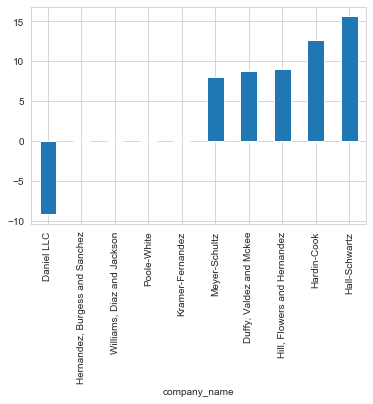

In [16]:
# Top 10 best paid companies
df['total_gross'].groupby(df['company_name']).mean().sort_values(ascending=True)[:10].plot(kind='bar')

/Users/danielcollsol/.local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


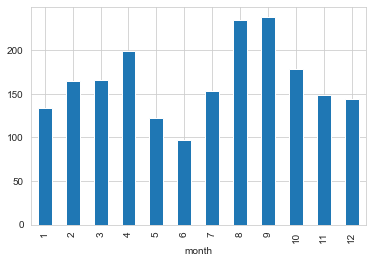

In [17]:

# Let's evaluate the total gross by month using only 1 day contracts
df_season = df[df['hiring_starts_on']-df['hiring_ends_on'] == timedelta(days=-1)]
df_season['month'] = df_season.apply(lambda row: row.hiring_ends_on.month, axis = 1)

df_season['total_gross'].groupby(df_season['month']).mean().plot(kind='bar')

Any interesting relation between the fee_percentage and the job_function or company?

In [18]:
df['fee_percentage'].groupby(df['job_function']).mean().sort_values()

job_function
saver                    0.100000
dontmesswithme-guy       1.582918
tech-guy                 1.683750
help-guy                 1.692650
org-guy                  1.700000
money-guy                2.177363
people-guy               2.185479
runner                   2.500000
phone-guy                2.613514
tech-art-guy             3.111111
minister                 3.617390
carwasher                4.778281
caller                   4.875733
pasta-guy                4.897500
dream-constructor        5.200000
restaurant-hotel-guy     5.200022
f1-guy                   5.329656
annoying-guy             5.339027
support-guy              5.400248
dude-guy                 5.564412
art-guy                  6.000000
beer-guy                 6.081097
buzz-guy                 6.100454
testing-guy              6.133676
lang-guy                 6.500000
editor                   6.532547
chain-guy                6.544598
noise-guy                6.701240
dev-guy                  6.972922
s

In [19]:
# Top 10 companies with highest fees
df['fee_percentage'].groupby(df['company_name']).mean().sort_values(ascending=False)[:10]

company_name
Harmon, Stephens and Ruiz        33.084177
Lopez, Alexander and Williams    22.100000
Moon PLC                         15.000000
Johnson and Sons                 13.770000
Ryan-Costa                       13.735556
Spence, Bean and Thomas          12.818571
Ingram, Sanchez and Doyle        12.729000
Ellis, Payne and Petty           12.520000
Perez-Graham                     12.250000
Ware, Wells and Campbell         12.000000
Name: fee_percentage, dtype: float64

In [20]:
# Companies without fees
ser = df['fee_percentage'].groupby(df['company_name']).mean().sort_values(ascending=False)
ser[ser == 0]

company_name
Le-Wolf                          0.0
Gomez Group                      0.0
Marquez-Byrd                     0.0
Goodwin and Sons                 0.0
Cortez, Mcfarland and Barrera    0.0
Proctor Inc                      0.0
Atkinson Group                   0.0
Tucker-Rice                      0.0
Ortega, Vazquez and Hill         0.0
Rollins Ltd                      0.0
Delacruz Inc                     0.0
Smith Group                      0.0
Lopez and Sons                   0.0
Simmons and Sons                 0.0
White LLC                        0.0
Moody, Harris and Gray           0.0
Parrish Inc                      0.0
Name: fee_percentage, dtype: float64

Which are the job_function and companies that required to work the most on the weekend?

In [21]:
df_season['week_day'] = df_season.apply(lambda row: row.hiring_ends_on.dayofweek, axis=1)
week_days = {1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday',5:'Friday', 6:'Saturday', 7:'Sunday' }
df_season['week_day']= df_season['week_day'].map(week_days)

/Users/danielcollsol/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/danielcollsol/.local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [22]:

ser = df_season[(df_season['week_day']== 'Saturday')| (df_season['week_day']== 'Sunday')]
ser[['week_day','job_function','company_name']].groupby(by=['company_name','job_function']).count()


week_day
company_name                     job_function                  
Boyd-Simpson                     knowledge-guy                2
Flores and Sons                  ware-man                     3
Hall Group                       annoying-guy                 1
Miller, Hall and Rodriguez       saver-guy                    1
Porter, Romero and Stewart       editor                       1
                                 restaurant-hotel-guy        20
Ramirez PLC                      knowledge-guy               22
Santiago, Mccall and Fitzpatrick store-noise-guy              1
Skinner, Watson and Garcia       drop-guy                     1
Smith and Sons                   restaurant-hotel-guy         2
Watkins-Miller                   chef                         1
Yates, Mayo and Russell          restaurant-hotel-guy         2

The companies that require to work the most on weekends are by far Ramirez PLC followed by Boyd-Simpson and Flores and Sons. The most demanded job function is knoeledge-guy and restaurant-hotel-guy.

Is there any patterns for the cancelled contracts (when cancellation_date.notnull())?

In [23]:
ser2 = df[df['cancellation_date'].notnull()].groupby(df['company_name'])
ser2 = ser2['wp_id'].count()
ser2 = ser2[ser2 > 30].sort_values(ascending=False)
ser2

company_name
Gonzalez PLC                     746
Peterson-Wilson                  397
Norman PLC                       305
Pearson Group                    241
Davies LLC                       189
Lopez-Rivera                     139
Adams LLC                        137
Hansen Inc                       126
Reyes LLC                        119
Foley-Miller                     117
Rivera, Henry and Tran           111
Le Inc                           102
Willis-Black                      78
Hill PLC                          78
Conley, Anderson and Henry        75
Williams, Mccarthy and Martin     65
Berry, Hunt and Moore             62
Howard, Robinson and Simpson      55
Harris, Allen and Conrad          49
Bishop-Hayes                      48
Smith and Sons                    47
Hernandez Group                   45
Beltran, Dawson and Fuller        43
Acosta-Mcpherson                  43
Castro Group                      40
Young Ltd                         39
Hurst-Garcia             

Seems that most of the cancellations are concentrated in a few companies

In [24]:
df.head()

,hiring_id,wp_id,hiring_status,wp_status,business_model,company_id,company_name,hiring_created_at,wp_created_at,hiring_starts_on,hiring_ends_on,wp_starts_on,wp_ends_on,job_function,job_country,candidate_id,candidate_name,total_gross,est_total_gross,currency,issue_reported,contract_type,gross_wage_amount,gross_wage_time_unit,gross_wage_currency_id,work_period_unit,work_period_amount,work_period_hours,fee_percentage,cancellation_date,is_outsourced
0,166037,1723992,ready_to_work,upcoming,staffing_agency,299204747,Hurst-Garcia,2017-01-12 15:57:41,2017-09-13 09:01:22,2017-01-16,2021-01-15,2020-04-01,2020-04-30,support-guy,ES,49285305,Kenneth Price,1114.285714,1114.285714,EUR,False,full_time,650,hour,EUR,month,2.0,40.0,3.92,NaN,NaN
1,569936,7254150,hiring_closed_out,paid,staffing_agency,237165491,Reese and Sons,2017-02-27 10:27:24,2017-03-19 13:50:52,2017-02-27,2017-05-28,2017-03-20,2017-03-26,noise-guy,GB,57619821,Susan Santos,346.970000,364.877990,GBP,False,by_hours,750,hour,GBP,week,12.0,40.0,10.09,NaN,NaN
2,352139,4706480,hiring_closed_out,paid,staffing_agency,168767792,Peterson-Wilson,2017-01-10 17:02:04,2017-01-10 17:23:14,2017-01-10,2018-01-09,2017-10-01,2017-10-31,f1-guy,ES,57564699,Susan Jensen,1061.660000,1041.660000,EUR,False,full_time,104166,month,EUR,month,12.0,40.0,5.00,NaN,NaN
3,313527,5362133,hiring_closed_out,paid,independent_contractor,211514331,Eaton LLC,2017-09-07 15:10:16,2018-02-01 16:15:30,2017-09-04,2018-03-18,2018-01-29,2018-02-04,drop-guy,GB,57795686,Michael Day,455.000000,390.840322,GBP,True,full_time,800,hour,GBP,week,12.0,40.0,9.00,NaN,NaN
4,425850,5002046,hiring_closed_out,paid,staffing_agency,146877029,Adams LLC,2017-07-04 08:33:55,2017-07-10 14:50:53,2017-07-10,2017-08-28,2017-08-01,2017-08-28,f1-guy,ES,52752416,Christie Keller,664.280000,1031.968000,EUR,False,full_time,110568,month,EUR,month,1.6,40.0,0.00,NaN,NaN


In [25]:
ser2 = df[df['cancellation_date'].notnull()].groupby(df['job_country'])
ser2 = ser2['wp_id'].count()
ser2 = ser2[ser2 > 30].sort_values(ascending=False)
ser2

job_country
ES    4652
GB     527
Name: wp_id, dtype: int64

Most of the cancellations comes from Spain.

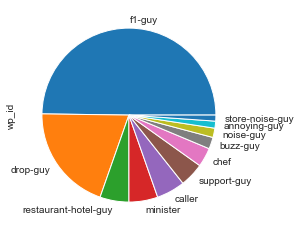

In [26]:
ser2 = df[df['cancellation_date'].notnull()].groupby(df['job_function'])
ser2 = ser2['wp_id'].count()
ser2 = ser2[ser2 > 50].sort_values(ascending=False)
ser2.plot(kind='pie')

The main cancellations come from the 'f1-guy' job function followed by 'drop-guy' and 'restaurant-hotel-guy'.

In [27]:
ser2 = df[df['cancellation_date'].notnull()].groupby(df['business_model'])
ser2 = ser2['wp_id'].count()
ser2 = ser2[ser2 > 30].sort_values(ascending=False)
ser2

business_model
staffing_agency           5114
independent_contractor      65
Name: wp_id, dtype: int64

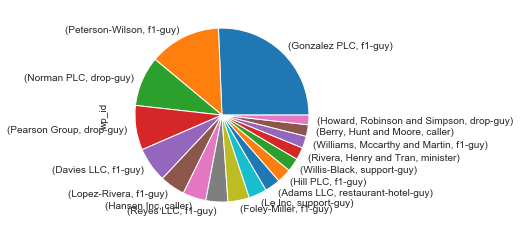

In [28]:
ser2 = df[df['cancellation_date'].notnull()].groupby(by=['company_name','job_function'])
ser2 = ser2['wp_id'].count()
ser2 = ser2[ser2 > 50].sort_values(ascending=False)
ser2.plot(kind='pie')

The main cancellation comes from few companies & job functions

### 4. Implementing a multivariate linear regression Example

Lacks: normalitzation or standarization + cross validation

In [29]:
# Import for Linear Regression
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression, LogisticRegression

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

from sklearn import metrics
%matplotlib inline

In [30]:
df.head()

,hiring_id,wp_id,hiring_status,wp_status,business_model,company_id,company_name,hiring_created_at,wp_created_at,hiring_starts_on,hiring_ends_on,wp_starts_on,wp_ends_on,job_function,job_country,candidate_id,candidate_name,total_gross,est_total_gross,currency,issue_reported,contract_type,gross_wage_amount,gross_wage_time_unit,gross_wage_currency_id,work_period_unit,work_period_amount,work_period_hours,fee_percentage,cancellation_date,is_outsourced
0,166037,1723992,ready_to_work,upcoming,staffing_agency,299204747,Hurst-Garcia,2017-01-12 15:57:41,2017-09-13 09:01:22,2017-01-16,2021-01-15,2020-04-01,2020-04-30,support-guy,ES,49285305,Kenneth Price,1114.285714,1114.285714,EUR,False,full_time,650,hour,EUR,month,2.0,40.0,3.92,NaN,NaN
1,569936,7254150,hiring_closed_out,paid,staffing_agency,237165491,Reese and Sons,2017-02-27 10:27:24,2017-03-19 13:50:52,2017-02-27,2017-05-28,2017-03-20,2017-03-26,noise-guy,GB,57619821,Susan Santos,346.970000,364.877990,GBP,False,by_hours,750,hour,GBP,week,12.0,40.0,10.09,NaN,NaN
2,352139,4706480,hiring_closed_out,paid,staffing_agency,168767792,Peterson-Wilson,2017-01-10 17:02:04,2017-01-10 17:23:14,2017-01-10,2018-01-09,2017-10-01,2017-10-31,f1-guy,ES,57564699,Susan Jensen,1061.660000,1041.660000,EUR,False,full_time,104166,month,EUR,month,12.0,40.0,5.00,NaN,NaN
3,313527,5362133,hiring_closed_out,paid,independent_contractor,211514331,Eaton LLC,2017-09-07 15:10:16,2018-02-01 16:15:30,2017-09-04,2018-03-18,2018-01-29,2018-02-04,drop-guy,GB,57795686,Michael Day,455.000000,390.840322,GBP,True,full_time,800,hour,GBP,week,12.0,40.0,9.00,NaN,NaN
4,425850,5002046,hiring_closed_out,paid,staffing_agency,146877029,Adams LLC,2017-07-04 08:33:55,2017-07-10 14:50:53,2017-07-10,2017-08-28,2017-08-01,2017-08-28,f1-guy,ES,52752416,Christie Keller,664.280000,1031.968000,EUR,False,full_time,110568,month,EUR,month,1.6,40.0,0.00,NaN,NaN


In [31]:
df_reg = df[['total_gross','est_total_gross','gross_wage_amount','fee_percentage']]

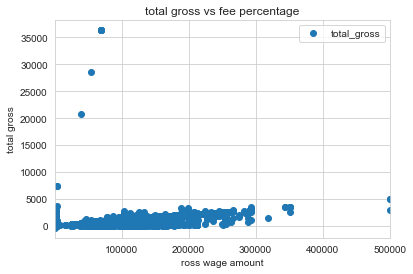

In [32]:
df_reg.plot(y='total_gross', x='gross_wage_amount', style='o')  
plt.title('total gross vs fee percentage')  
plt.ylabel('total gross')  
plt.xlabel('ross wage amount')  
plt.show()

In [33]:
df.head()

,hiring_id,wp_id,hiring_status,wp_status,business_model,company_id,company_name,hiring_created_at,wp_created_at,hiring_starts_on,hiring_ends_on,wp_starts_on,wp_ends_on,job_function,job_country,candidate_id,candidate_name,total_gross,est_total_gross,currency,issue_reported,contract_type,gross_wage_amount,gross_wage_time_unit,gross_wage_currency_id,work_period_unit,work_period_amount,work_period_hours,fee_percentage,cancellation_date,is_outsourced
0,166037,1723992,ready_to_work,upcoming,staffing_agency,299204747,Hurst-Garcia,2017-01-12 15:57:41,2017-09-13 09:01:22,2017-01-16,2021-01-15,2020-04-01,2020-04-30,support-guy,ES,49285305,Kenneth Price,1114.285714,1114.285714,EUR,False,full_time,650,hour,EUR,month,2.0,40.0,3.92,NaN,NaN
1,569936,7254150,hiring_closed_out,paid,staffing_agency,237165491,Reese and Sons,2017-02-27 10:27:24,2017-03-19 13:50:52,2017-02-27,2017-05-28,2017-03-20,2017-03-26,noise-guy,GB,57619821,Susan Santos,346.970000,364.877990,GBP,False,by_hours,750,hour,GBP,week,12.0,40.0,10.09,NaN,NaN
2,352139,4706480,hiring_closed_out,paid,staffing_agency,168767792,Peterson-Wilson,2017-01-10 17:02:04,2017-01-10 17:23:14,2017-01-10,2018-01-09,2017-10-01,2017-10-31,f1-guy,ES,57564699,Susan Jensen,1061.660000,1041.660000,EUR,False,full_time,104166,month,EUR,month,12.0,40.0,5.00,NaN,NaN
3,313527,5362133,hiring_closed_out,paid,independent_contractor,211514331,Eaton LLC,2017-09-07 15:10:16,2018-02-01 16:15:30,2017-09-04,2018-03-18,2018-01-29,2018-02-04,drop-guy,GB,57795686,Michael Day,455.000000,390.840322,GBP,True,full_time,800,hour,GBP,week,12.0,40.0,9.00,NaN,NaN
4,425850,5002046,hiring_closed_out,paid,staffing_agency,146877029,Adams LLC,2017-07-04 08:33:55,2017-07-10 14:50:53,2017-07-10,2017-08-28,2017-08-01,2017-08-28,f1-guy,ES,52752416,Christie Keller,664.280000,1031.968000,EUR,False,full_time,110568,month,EUR,month,1.6,40.0,0.00,NaN,NaN


In [34]:
X = df[['gross_wage_amount','fee_percentage','work_period_amount','work_period_hours']].values.reshape(-1,4)
y = df['total_gross'].values.reshape(-1,1)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [36]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

[258.53268512]
[[ 4.09096259e-03 -3.06821060e+01 -1.31195885e+00  1.30769545e+01]]


In [38]:
# Let's make some predictions
y_pred = regressor.predict(X_test)

In [39]:
df_res = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df_res

,Actual,Predicted
0,488.370000,1050.697959
1,452.760000,437.466562
2,605.500000,493.001174
3,320.000000,493.001174
4,168.110000,394.064161
...,...,...
3995,312.800000,158.318495
3996,1256.571429,783.428777
3997,1023.428571,670.751563
3998,390.840322,483.796542


In [40]:
# Evaluate performance of the algorithm
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 311.32512475022094
Mean Squared Error: 489394.865973611
Root Mean Squared Error: 699.5676278771131


### 4. Implementing a multivariate logistic regression Example


In [41]:
df.head()

,hiring_id,wp_id,hiring_status,wp_status,business_model,company_id,company_name,hiring_created_at,wp_created_at,hiring_starts_on,hiring_ends_on,wp_starts_on,wp_ends_on,job_function,job_country,candidate_id,candidate_name,total_gross,est_total_gross,currency,issue_reported,contract_type,gross_wage_amount,gross_wage_time_unit,gross_wage_currency_id,work_period_unit,work_period_amount,work_period_hours,fee_percentage,cancellation_date,is_outsourced
0,166037,1723992,ready_to_work,upcoming,staffing_agency,299204747,Hurst-Garcia,2017-01-12 15:57:41,2017-09-13 09:01:22,2017-01-16,2021-01-15,2020-04-01,2020-04-30,support-guy,ES,49285305,Kenneth Price,1114.285714,1114.285714,EUR,False,full_time,650,hour,EUR,month,2.0,40.0,3.92,NaN,NaN
1,569936,7254150,hiring_closed_out,paid,staffing_agency,237165491,Reese and Sons,2017-02-27 10:27:24,2017-03-19 13:50:52,2017-02-27,2017-05-28,2017-03-20,2017-03-26,noise-guy,GB,57619821,Susan Santos,346.970000,364.877990,GBP,False,by_hours,750,hour,GBP,week,12.0,40.0,10.09,NaN,NaN
2,352139,4706480,hiring_closed_out,paid,staffing_agency,168767792,Peterson-Wilson,2017-01-10 17:02:04,2017-01-10 17:23:14,2017-01-10,2018-01-09,2017-10-01,2017-10-31,f1-guy,ES,57564699,Susan Jensen,1061.660000,1041.660000,EUR,False,full_time,104166,month,EUR,month,12.0,40.0,5.00,NaN,NaN
3,313527,5362133,hiring_closed_out,paid,independent_contractor,211514331,Eaton LLC,2017-09-07 15:10:16,2018-02-01 16:15:30,2017-09-04,2018-03-18,2018-01-29,2018-02-04,drop-guy,GB,57795686,Michael Day,455.000000,390.840322,GBP,True,full_time,800,hour,GBP,week,12.0,40.0,9.00,NaN,NaN
4,425850,5002046,hiring_closed_out,paid,staffing_agency,146877029,Adams LLC,2017-07-04 08:33:55,2017-07-10 14:50:53,2017-07-10,2017-08-28,2017-08-01,2017-08-28,f1-guy,ES,52752416,Christie Keller,664.280000,1031.968000,EUR,False,full_time,110568,month,EUR,month,1.6,40.0,0.00,NaN,NaN


In [42]:
# Define logistic regression model 
logreg = LogisticRegression()

In [43]:
# Select dependent and independent variables for regression
columns_for_regression = ['total_gross','job_country','job_function','gross_wage_amount']
df_mul_reg = df[columns_for_regression]
df_mul_reg.head()

,total_gross,job_country,job_function,gross_wage_amount
0,1114.285714,ES,support-guy,650
1,346.970000,GB,noise-guy,750
2,1061.660000,ES,f1-guy,104166
3,455.000000,GB,drop-guy,800
4,664.280000,ES,f1-guy,110568


Converting categorical feature into one hot encoding


In [44]:
# Select independent variables used for regression
X = df_mul_reg.drop('job_country', axis='columns') 
X

,total_gross,job_function,gross_wage_amount
0,1114.285714,support-guy,650
1,346.970000,noise-guy,750
2,1061.660000,f1-guy,104166
3,455.000000,drop-guy,800
4,664.280000,f1-guy,110568
...,...,...,...
19995,1062.000000,minister,106200
19996,390.840322,drop-guy,800
19997,582.000000,drop-guy,800
19998,1292.930000,f1-guy,125834


In [45]:
# Hot encode independent var that are categorical & passthrough others
columns_to_encode = ['job_function']

column_trans = make_column_transformer(
    (OneHotEncoder(), columns_to_encode), #columns_to_encode
    remainder='passthrough')
X = column_trans.fit_transform(X).toarray()

In [46]:
# Define dependent variable
y = df['job_country'].values.reshape(-1,1)

In [47]:
# Train the model
logreg.fit(X,y)

/Users/danielcollsol/miniconda3/envs/pycourse/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [48]:
# Get a prediction
y_pred = logreg.predict(X)

In [49]:
#Compare results
df_res = pd.DataFrame({'Actual': y.flatten(), 'Predicted': y_pred.flatten()})
df_res

,Actual,Predicted
0,ES,ES
1,GB,ES
2,ES,ES
3,GB,GB
4,ES,ES
...,...,...
19995,ES,ES
19996,GB,GB
19997,GB,GB
19998,ES,ES


In [50]:
# Evaluate performance of the algorithm
a = df_res['Actual']==df_res['Predicted']
a.value_counts()

True     18132
False     1868
dtype: int64

### 5. Principal Component Analysis

### 6. Implementing a multivariate linear regression Example 2


Lacks normalization

In [51]:
df.head()

,hiring_id,wp_id,hiring_status,wp_status,business_model,company_id,company_name,hiring_created_at,wp_created_at,hiring_starts_on,hiring_ends_on,wp_starts_on,wp_ends_on,job_function,job_country,candidate_id,candidate_name,total_gross,est_total_gross,currency,issue_reported,contract_type,gross_wage_amount,gross_wage_time_unit,gross_wage_currency_id,work_period_unit,work_period_amount,work_period_hours,fee_percentage,cancellation_date,is_outsourced
0,166037,1723992,ready_to_work,upcoming,staffing_agency,299204747,Hurst-Garcia,2017-01-12 15:57:41,2017-09-13 09:01:22,2017-01-16,2021-01-15,2020-04-01,2020-04-30,support-guy,ES,49285305,Kenneth Price,1114.285714,1114.285714,EUR,False,full_time,650,hour,EUR,month,2.0,40.0,3.92,NaN,NaN
1,569936,7254150,hiring_closed_out,paid,staffing_agency,237165491,Reese and Sons,2017-02-27 10:27:24,2017-03-19 13:50:52,2017-02-27,2017-05-28,2017-03-20,2017-03-26,noise-guy,GB,57619821,Susan Santos,346.970000,364.877990,GBP,False,by_hours,750,hour,GBP,week,12.0,40.0,10.09,NaN,NaN
2,352139,4706480,hiring_closed_out,paid,staffing_agency,168767792,Peterson-Wilson,2017-01-10 17:02:04,2017-01-10 17:23:14,2017-01-10,2018-01-09,2017-10-01,2017-10-31,f1-guy,ES,57564699,Susan Jensen,1061.660000,1041.660000,EUR,False,full_time,104166,month,EUR,month,12.0,40.0,5.00,NaN,NaN
3,313527,5362133,hiring_closed_out,paid,independent_contractor,211514331,Eaton LLC,2017-09-07 15:10:16,2018-02-01 16:15:30,2017-09-04,2018-03-18,2018-01-29,2018-02-04,drop-guy,GB,57795686,Michael Day,455.000000,390.840322,GBP,True,full_time,800,hour,GBP,week,12.0,40.0,9.00,NaN,NaN
4,425850,5002046,hiring_closed_out,paid,staffing_agency,146877029,Adams LLC,2017-07-04 08:33:55,2017-07-10 14:50:53,2017-07-10,2017-08-28,2017-08-01,2017-08-28,f1-guy,ES,52752416,Christie Keller,664.280000,1031.968000,EUR,False,full_time,110568,month,EUR,month,1.6,40.0,0.00,NaN,NaN


In [52]:
# Config
dependent_variable = ['total_gross']
independent_variables = ['company_name','gross_wage_amount','currency', 'business_model', 'job_function', 
                         'job_function', 'issue_reported', 'gross_wage_time_unit','work_period_unit',
                        'work_period_amount', 'work_period_hours']
categorical_variables = ['company_name','currency', 'business_model', 'job_function', 'job_function',
                         'issue_reported','gross_wage_time_unit','work_period_unit']
datetime_variables = ['hiring_starts_on','hiring_ends_on']

### Preprocessing

In [53]:
# Create working dataframe
df_w = df[independent_variables]
df_w.head()

,company_name,gross_wage_amount,currency,business_model,job_function,job_function,issue_reported,gross_wage_time_unit,work_period_unit,work_period_amount,work_period_hours
0,Hurst-Garcia,650,EUR,staffing_agency,support-guy,support-guy,False,hour,month,2.0,40.0
1,Reese and Sons,750,GBP,staffing_agency,noise-guy,noise-guy,False,hour,week,12.0,40.0
2,Peterson-Wilson,104166,EUR,staffing_agency,f1-guy,f1-guy,False,month,month,12.0,40.0
3,Eaton LLC,800,GBP,independent_contractor,drop-guy,drop-guy,True,hour,week,12.0,40.0
4,Adams LLC,110568,EUR,staffing_agency,f1-guy,f1-guy,False,month,month,1.6,40.0


In [54]:
# Convert categorical variables to one hot encoding
df_temp = pd.get_dummies(df[categorical_variables], drop_first=True)
df_temp.head()

# Add  result to working dataframe
df_w = pd.concat([df_w,df_temp], axis='columns')

# Drop original categorical columns
df_w.drop(categorical_variables, axis=1, inplace=True)

# Show results
df_w.head()

,gross_wage_amount,work_period_amount,work_period_hours,company_name_Adams LLC,company_name_Aguirre-Baker,company_name_Alexander LLC,company_name_Allen and Sons,company_name_Allen-Harris,company_name_Alvarez-Cruz,"company_name_Anderson, Schwartz and Morris",company_name_Andrade Ltd,company_name_Andrews-Banks,company_name_Armstrong-Mills,company_name_Arnold Inc,"company_name_Arnold, Lee and Holland",company_name_Atkinson Group,"company_name_Ayala, Rodriguez and Washington",company_name_Bailey-Collins,company_name_Baker LLC,company_name_Baker and Sons,company_name_Baldwin PLC,company_name_Barrett-Mcpherson,"company_name_Barry, Alvarez and Elliott",company_name_Bass Ltd,"company_name_Bates, Chan and Cervantes",company_name_Beck-Washington,company_name_Bell Inc,"company_name_Bell, Howard and Wilson",company_name_Beltran Ltd,"company_name_Beltran, Dawson and Fuller",company_name_Bennett-Erickson,company_name_Bennett-Zuniga,"company_name_Berry, Hunt and Moore","company_name_Bird, Vaughn and Erickson",company_name_Bishop-Hayes,company_name_Boyd-Simpson,company_name_Bradley LLC,company_name_Bradley Ltd,"company_name_Brandt, Myers and Harrington","company_name_Brennan, Phillips and White",company_name_Brewer-Davis,company_name_Brooks Ltd,company_name_Brown-Dalton,company_name_Brown-Lopez,company_name_Brown-Williams,company_name_Bruce PLC,company_name_Bryan Ltd,company_name_Burton-Lopez,company_name_Bush Inc,company_name_Butler PLC,company_name_Callahan Inc,company_name_Camacho PLC,company_name_Campbell-Welch,company_name_Cantu Inc,"company_name_Carey, Gray and Long",company_name_Carey-Holland,"company_name_Carlson, Mccarthy and Noble",company_name_Carr-Johnston,company_name_Carter-Reynolds,company_name_Castillo Group,"company_name_Castillo, Jackson and Rodriguez",company_name_Castro Group,company_name_Castro PLC,company_name_Chambers LLC,"company_name_Chambers, Joseph and Hart",company_name_Chase Ltd,company_name_Chen PLC,company_name_Christensen and Sons,"company_name_Chung, Smith and Harris",company_name_Chung-Benson,"company_name_Clark, Byrd and Brown","company_name_Clark, Clark and Scott",company_name_Clayton-Rodriguez,company_name_Clements-Cohen,company_name_Cobb and Sons,company_name_Cobb-Fletcher,company_name_Cohen LLC,"company_name_Cole, Meyers and Payne","company_name_Collins, Fisher and Short","company_name_Conley, Anderson and Henry",company_name_Contreras-Campbell,"company_name_Cooper, Carney and Wilson","company_name_Cooper, Jensen and Sanchez",company_name_Cooper-Watson,"company_name_Cortez, Mcfarland and Barrera",company_name_Cox-Villa,"company_name_Crawford, Molina and Noble",company_name_Cruz Inc,company_name_Cruz Ltd,company_name_Cummings-Rodriguez,company_name_Cunningham Inc,"company_name_Cunningham, Ellis and Miller",company_name_Dalton Ltd,"company_name_Dalton, Jackson and Fry",company_name_Daniel LLC,"company_name_Daniel, Craig and Mcintosh","company_name_Daniel, Mcintosh and Hahn",company_name_Davies LLC,company_name_Davis Group,company_name_Davis PLC,"company_name_Davis, Miller and Rowe",company_name_Davis-Reynolds,company_name_Davis-Wilson,company_name_Dawson-Powers,company_name_Decker-Taylor,company_name_Delacruz Inc,company_name_Deleon-Cunningham,company_name_Delgado-Travis,company_name_Diaz-Richardson,company_name_Dickerson LLC,company_name_Dickson PLC,company_name_Dillon LLC,company_name_Dillon-Roman,company_name_Dixon Ltd,company_name_Dixon-Bauer,company_name_Doyle Inc,company_name_Doyle Ltd,company_name_Duarte PLC,company_name_Duffy LLC,"company_name_Duffy, Valdez and Mckee","company_name_Duncan, Thomas and Lopez","company_name_Durham, Valencia and Day",company_name_Durham-Gonzalez,company_name_Eaton LLC,company_name_Ellis and Sons,"company_name_Ellis, Payne and Petty",company_name_English and Sons,company_name_Estes Group,company_name_Estes Ltd,company_name_Farmer and Sons,company_name_Fernandez-Cooper,"company_name_Figueroa, Wade and Golden",company_name_Fischer LLC,company_name_Fischer and Sons,company

In [55]:
# Convert datetime variables into numerical
df_temp = df[datetime_variables]
df_temp['days_worked'] = df_temp.apply(lambda row: row.hiring_ends_on - row.hiring_starts_on, axis='columns')
df_temp['days_worked']= df_temp['days_worked'].apply(lambda row: row.days)

# Add  result to working dataframe
df_w = pd.concat([df_w,df_temp], axis='columns')

# Drop original datetime columns
df_w.drop(datetime_variables, axis=1, inplace=True)

# Show results
df_w.head()

/Users/danielcollsol/.local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/danielcollsol/.local/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,gross_wage_amount,work_period_amount,work_period_hours,company_name_Adams LLC,company_name_Aguirre-Baker,company_name_Alexander LLC,company_name_Allen and Sons,company_name_Allen-Harris,company_name_Alvarez-Cruz,"company_name_Anderson, Schwartz and Morris",company_name_Andrade Ltd,company_name_Andrews-Banks,company_name_Armstrong-Mills,company_name_Arnold Inc,"company_name_Arnold, Lee and Holland",company_name_Atkinson Group,"company_name_Ayala, Rodriguez and Washington",company_name_Bailey-Collins,company_name_Baker LLC,company_name_Baker and Sons,company_name_Baldwin PLC,company_name_Barrett-Mcpherson,"company_name_Barry, Alvarez and Elliott",company_name_Bass Ltd,"company_name_Bates, Chan and Cervantes",company_name_Beck-Washington,company_name_Bell Inc,"company_name_Bell, Howard and Wilson",company_name_Beltran Ltd,"company_name_Beltran, Dawson and Fuller",company_name_Bennett-Erickson,company_name_Bennett-Zuniga,"company_name_Berry, Hunt and Moore","company_name_Bird, Vaughn and Erickson",company_name_Bishop-Hayes,company_name_Boyd-Simpson,company_name_Bradley LLC,company_name_Bradley Ltd,"company_name_Brandt, Myers and Harrington","company_name_Brennan, Phillips and White",company_name_Brewer-Davis,company_name_Brooks Ltd,company_name_Brown-Dalton,company_name_Brown-Lopez,company_name_Brown-Williams,company_name_Bruce PLC,company_name_Bryan Ltd,company_name_Burton-Lopez,company_name_Bush Inc,company_name_Butler PLC,company_name_Callahan Inc,company_name_Camacho PLC,company_name_Campbell-Welch,company_name_Cantu Inc,"company_name_Carey, Gray and Long",company_name_Carey-Holland,"company_name_Carlson, Mccarthy and Noble",company_name_Carr-Johnston,company_name_Carter-Reynolds,company_name_Castillo Group,"company_name_Castillo, Jackson and Rodriguez",company_name_Castro Group,company_name_Castro PLC,company_name_Chambers LLC,"company_name_Chambers, Joseph and Hart",company_name_Chase Ltd,company_name_Chen PLC,company_name_Christensen and Sons,"company_name_Chung, Smith and Harris",company_name_Chung-Benson,"company_name_Clark, Byrd and Brown","company_name_Clark, Clark and Scott",company_name_Clayton-Rodriguez,company_name_Clements-Cohen,company_name_Cobb and Sons,company_name_Cobb-Fletcher,company_name_Cohen LLC,"company_name_Cole, Meyers and Payne","company_name_Collins, Fisher and Short","company_name_Conley, Anderson and Henry",company_name_Contreras-Campbell,"company_name_Cooper, Carney and Wilson","company_name_Cooper, Jensen and Sanchez",company_name_Cooper-Watson,"company_name_Cortez, Mcfarland and Barrera",company_name_Cox-Villa,"company_name_Crawford, Molina and Noble",company_name_Cruz Inc,company_name_Cruz Ltd,company_name_Cummings-Rodriguez,company_name_Cunningham Inc,"company_name_Cunningham, Ellis and Miller",company_name_Dalton Ltd,"company_name_Dalton, Jackson and Fry",company_name_Daniel LLC,"company_name_Daniel, Craig and Mcintosh","company_name_Daniel, Mcintosh and Hahn",company_name_Davies LLC,company_name_Davis Group,company_name_Davis PLC,"company_name_Davis, Miller and Rowe",company_name_Davis-Reynolds,company_name_Davis-Wilson,company_name_Dawson-Powers,company_name_Decker-Taylor,company_name_Delacruz Inc,company_name_Deleon-Cunningham,company_name_Delgado-Travis,company_name_Diaz-Richardson,company_name_Dickerson LLC,company_name_Dickson PLC,company_name_Dillon LLC,company_name_Dillon-Roman,company_name_Dixon Ltd,company_name_Dixon-Bauer,company_name_Doyle Inc,company_name_Doyle Ltd,company_name_Duarte PLC,company_name_Duffy LLC,"company_name_Duffy, Valdez and Mckee","company_name_Duncan, Thomas and Lopez","company_name_Durham, Valencia and Day",company_name_Durham-Gonzalez,company_name_Eaton LLC,company_name_Ellis and Sons,"company_name_Ellis, Payne and Petty",company_name_English and Sons,company_name_Estes Group,company_name_Estes Ltd,company_name_Farmer and Sons,company_name_Fernandez-Cooper,"company_name_Figueroa, Wade and Golden",company_name_Fischer LLC,company_name_Fischer and Sons,company

In [58]:
X = df_w
y = df[dependent_variable]

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

In [60]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [61]:
y_pred = linreg.predict(X_test)

In [62]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)

In [66]:
#Closer to 1 better is the prediction
score

0.3341621767013795

### X. Evaluate how well performs the former algorithm


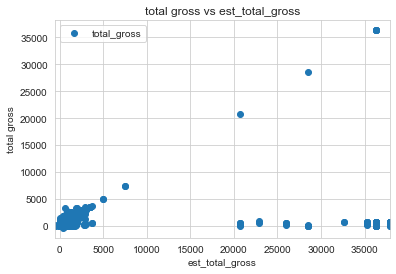

array([1114.28571429,  364.8779904 , 1041.66      , ...,  390.8403224 ,
       1258.34      ,  598.5389784 ])

In [64]:
total_gross = df['total_gross']
former_alg_est_total_gross = df['est_total_gross']

df.plot(y='total_gross', x='est_total_gross', style='o')  
plt.title('total gross vs est_total_gross')  
plt.ylabel('total gross')  
plt.xlabel('est_total_gross')  
plt.show()

# Convert series into numpy.array
total_gross.to_numpy()
former_alg_est_total_gross.to_numpy()

In [65]:
# Evaluate performance of the algorithm
print('Mean Absolute Error:', metrics.mean_absolute_error(former_alg_est_total_gross, total_gross))  
print('Mean Squared Error:', metrics.mean_squared_error(former_alg_est_total_gross, total_gross))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(former_alg_est_total_gross, total_gross)))

Mean Absolute Error: 245.36242505747742
Mean Squared Error: 5008356.1558161685
Root Mean Squared Error: 2237.935690723969
